In [11]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

**Three body problem** - Inital conditions

In [12]:
G = 1
m1 = m2 = m3 = 1

In [13]:
r1_0 = np.array([-0.97000436, 0.24308753])
r2_0 = np.array([0, 0])
r3_0 = np.array([0.97000436, -0.24308753])

In [14]:
v1_0 = np.array([0.466203685, 0.432365730])
v2_0 = np.array([-0.93240737, -0.86473146])
v3_0 = np.array([0.466203685, 0.432365730])

In [15]:
y0 = np.concatenate([r1_0, r2_0, r3_0, v1_0, v2_0, v3_0])

In [16]:
def three_body_system(_, y):
    r1, r2, r3 = y[:2], y[2:4], y[4:6]
    v1, v2, v3 = y[6:8], y[8:10], y[10:12]

    def acceleration(r1, r2, mj):
        r = np.linalg.norm(r2 - r1)
        return G * mj * (r2 - r1) / r**3

    a1 = acceleration(r1, r2, m2) + acceleration(r1, r3, m3)
    a2 = acceleration(r2, r1, m1) + acceleration(r2, r3, m3)
    a3 = acceleration(r3, r1, m1) + acceleration(r3, r2, m2)

    return np.concatenate([v1, v2, v3, a1, a2, a3])


In [17]:
t_span = [0,20]
t_eval = np.linspace(*t_span,1000)

In [18]:
solution = solve_ivp(three_body_system, t_span, y0, t_eval=t_eval, method='RK45', rtol=1e-6, atol=1e-6)

In [19]:
r1 = solution.y[:2]
r2 = solution.y[2:4]
r3 = solution.y[4:6]

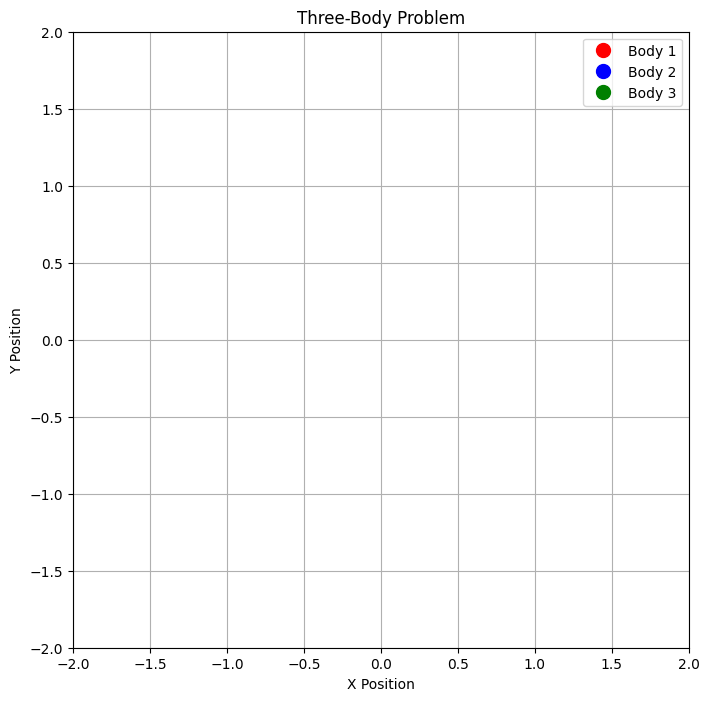

In [20]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_xlim(-2, 2)  # Adjust the limits as needed
ax.set_ylim(-2, 2)
ax.set_aspect('equal')
ax.grid(True)
colors = ['red', 'blue', 'green']
particles = [ax.plot([], [], 'o', color=c, markersize=10, label=f'Body {i+1}')[0]
            for i, c in enumerate(colors)]
trails = [ax.plot([], [], '-', color=c, alpha=0.3, lw=1.5)[0] for c in colors]

ax.legend()
plt.title('Three-Body Problem')
plt.xlabel('X Position')
plt.ylabel('Y Position')

def init():
    for particle, trail in zip(particles, trails):
        particle.set_data([], [])
        trail.set_data([], [])
    return particles + trails

def update(frame):
    trail_length = 150
    """Update positions and trails for each frame."""
    for i, (particle, trail) in enumerate(zip(particles, trails)):
        # Update particle position
        particle.set_data([solution.y[2 * i, frame]], [solution.y[2 * i + 1, frame]])

        # Update trail
        start = max(0, frame - trail_length)
        trail.set_data(solution.y[2 * i, start:frame + 1], solution.y[2 * i + 1, start:frame + 1])
    return particles + trails

anim = FuncAnimation(fig, update, frames=len(t_eval), init_func=init, blit=True,
                         interval=20, repeat=True)

plt.show()
